In [1]:
pip install --upgrade statsmodels

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
import seaborn as sns
# from statsmodels.formula.api import ols

In [3]:
df = pd.read_csv('Insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
print(df.shape)
df.describe()

(1338, 7)


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Univariate Statistics

In [6]:
print('not_numeric_columns: ',df.select_dtypes(exclude='number').columns)
print('numeric_columns: ',df.select_dtypes(include='number').columns)

not_numeric_columns:  Index(['sex', 'smoker', 'region'], dtype='object')
numeric_columns:  Index(['age', 'bmi', 'children', 'charges'], dtype='object')


In [7]:
for col in df.columns:
    print(f'{col}:{df[col].isnull().sum()}')

age:0
sex:0
bmi:0
children:0
smoker:0
region:0
charges:0


In [8]:
quantiles = pd.DataFrame({'25th percentile':[
    df['age'].quantile(.25),
    df['bmi'].quantile(.25),
    df['children'].quantile(.25),
    df['charges'].quantile(.25)],
                          '50th percentile':[
    df['age'].quantile(.50),
    df['bmi'].quantile(.50),
    df['children'].quantile(.50),
    df['charges'].quantile(.50)],
                          '75th percentile':[
    df['age'].quantile(.75),
    df['bmi'].quantile(.75),
    df['children'].quantile(.75),
    df['charges'].quantile(.75)]
                         },
                        index=['Age','bmi','children','charges'])
quantiles

,25th percentile,50th percentile,75th percentile
Age,27.00000,39.000,51.000000
bmi,26.29625,30.400,34.693750
children,0.00000,1.000,2.000000
charges,4740.28715,9382.033,16639.912515


In [9]:
mode = pd.DataFrame({
    'Mode':[df['age'].mode()[0],
           df['bmi'].mode()[0],
           df['children'].mode()[0],
           df['charges'].mode()[0]]
},
index=['Age','BMI','Children','Charges'])
mode

,Mode
Age,18.0000
BMI,32.3000
Children,0.0000
Charges,1639.5631


In [10]:
median = pd.DataFrame({
    'Mode':[df['age'].median(),
           df['bmi'].median(),
           df['children'].median(),
           df['charges'].median()]
},
index=['Age','BMI','Children','Charges'])
median

,Mode
Age,39.000
BMI,30.400
Children,1.000
Charges,9382.033


In [11]:
standard_deviation = pd.DataFrame({
    'Std':[df['age'].std(),
           df['bmi'].std(),
           df['children'].std(),
           df['charges'].std()]
},
index=['Age','BMI','Children','Charges'])
standard_deviation

from scipy.stats import skew, kurtosis

skew = pd.DataFrame({
    'Skew':[skew(df.age,bias=False),
           skew(df['bmi']),
           skew(df['children']),
           skew(df['charges'])]
},
index=['Age','BMI','Children','Charges'])
skew

kurt = pd.DataFrame({
    'Kurtosis':[kurtosis(df['age']),
           kurtosis(df['bmi']),
           kurtosis(df['children']),
           kurtosis(df['charges'])]
},
index=['Age','BMI','Children','Charges'])
print(standard_deviation)
print(kurt)
print(skew)

                   Std
Age          14.049960
BMI           6.098187
Children      1.205493
Charges   12110.011237
          Kurtosis
Age      -1.244921
BMI      -0.055023
Children  0.197217
Charges   1.595821
              Skew
Age       0.055673
BMI       0.283729
Children  0.937328
Charges   1.514180


# Bivariate Statistics

### num/num

In [12]:
df.corr()

C:\Users\ritus\AppData\Local\Temp\ipykernel_12036\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [13]:
# corr = stats.pearsonr(df['charges'],df['age'])
# corr
# corr = stats.pearsonr(df['charges'],df['children'])
# num = list(df.select_dtypes(include='number'))
# type(num)
corr_df = pd.DataFrame(columns=['r','p'])

for col in df.columns:
    if col in list(df.select_dtypes(include='number')) and col!= 'charges':
        r, p = stats.pearsonr(df['charges'],df[col])
        corr_df.loc[col] = [round(r,3), round(p,3)]
corr_df    

,r,p
age,0.299,0.000
bmi,0.198,0.000
children,0.068,0.013


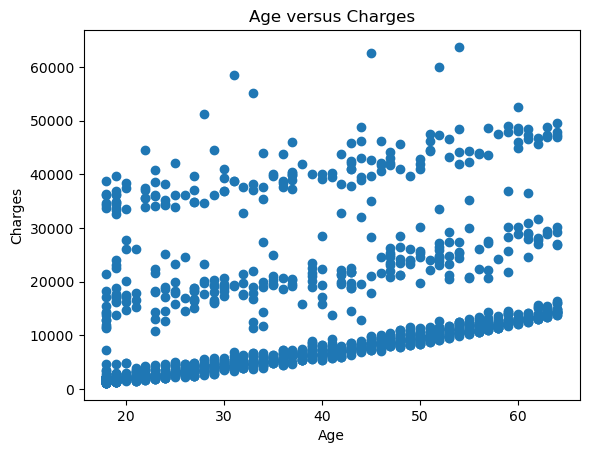

In [14]:
plt.scatter(df['age'],df['charges'])
plt.title('Age versus Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

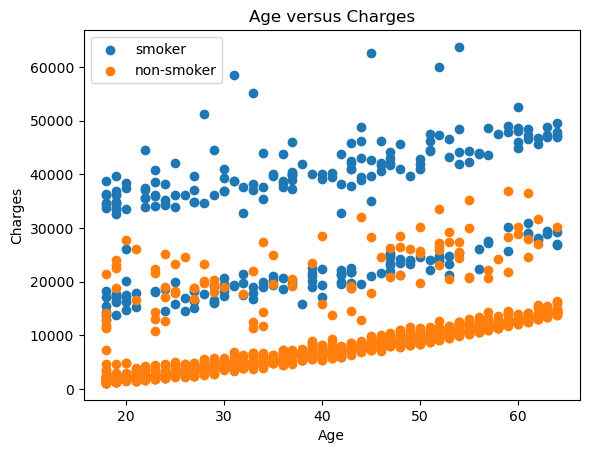

In [15]:
smoker_df = df[df['smoker']=='yes']
non_smoker_df = df[df['smoker']=='no']
plt.scatter(smoker_df['age'],smoker_df['charges'],label='smoker')
plt.scatter(non_smoker_df['age'],non_smoker_df['charges'],label='non-smoker')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age versus Charges')
plt.show()

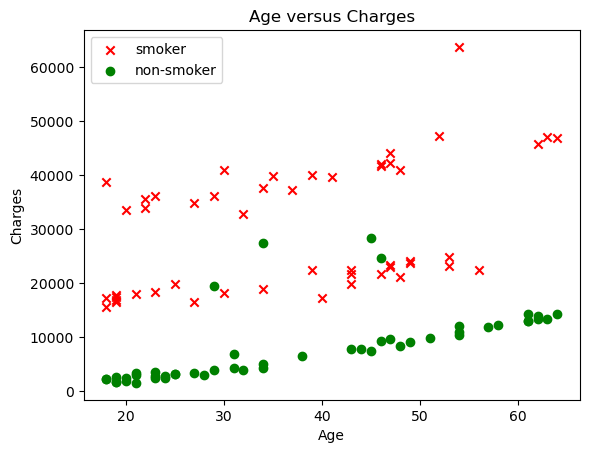

In [16]:
smoker_df_reduced = smoker_df.sample(50)
non_smoker_df_reduced = non_smoker_df.sample(50)
plt.scatter(smoker_df_reduced['age'],smoker_df_reduced['charges'],label='smoker',color='red',marker='x')
plt.scatter(non_smoker_df_reduced['age'],non_smoker_df_reduced['charges'],label='non-smoker',color='green',marker='o')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age versus Charges')
plt.show()

257.7226186668955 3165.885006063025 0.2990081933306477 4.886693331718491e-29 22.5023892867703


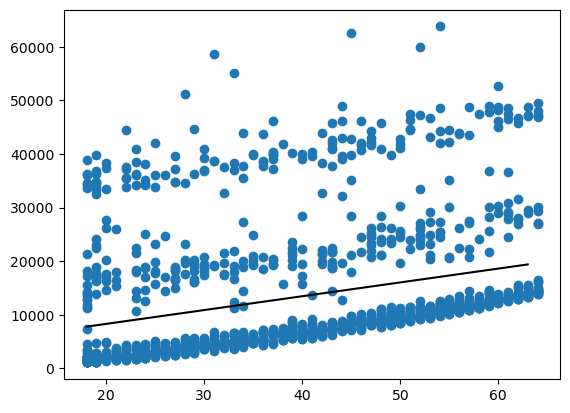

In [17]:
slope_m, intercept_c, r_value, p_value, std_err = stats.linregress(df['age'],df['charges'])
print(slope_m, intercept_c, r_value, p_value, std_err)
x = range(df['age'].min(),df['age'].max())
y = slope_m*x + intercept_c
plt.plot(x,y,color='black')
plt.scatter(df['age'],df['charges'])

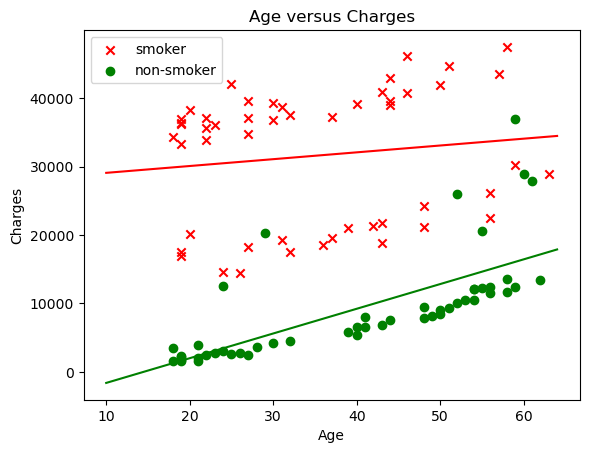

In [18]:
smoker_df_reduced = smoker_df.sample(50)
non_smoker_df_reduced = non_smoker_df.sample(50)
m1, c1, r1, p1, std_err_1 = stats.linregress(smoker_df_reduced['age'],smoker_df_reduced['charges'])
m2, c2, r2, p2, std_err_2 = stats.linregress(non_smoker_df_reduced['age'],non_smoker_df_reduced['charges'])
x = range(10,65)
y1 = m1*x+c1
y2 = m2*x+c2
plt.plot(x,y1,color='red')
plt.plot(x,y2,color='green')
plt.scatter(smoker_df_reduced['age'],smoker_df_reduced['charges'],label='smoker',color='red',marker='x')
plt.scatter(non_smoker_df_reduced['age'],non_smoker_df_reduced['charges'],label='non-smoker',color='green',marker='o')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age versus Charges')
plt.show()

In [19]:
# model = ols(formula='charges~age', data=df).fit()
# white_test = het_white(model.resid, model.model.exog)
# breushpagan_test = het_breuschpagan(model.resid, model.model.exog)
# output_df = pd.DataFrame(columns=['LM stat','LM p','F stat','F stat p'])
# output_df.loc['White']=white_test
# output_df.loc['Breusch-Pagan']=breushpagan_test
# output_df

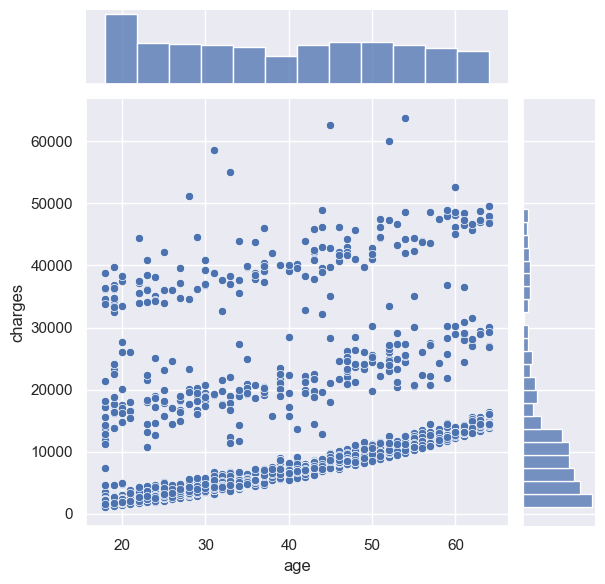

In [20]:
sns.set(color_codes=True)
sns.jointplot(x='age',y='charges',data=df)

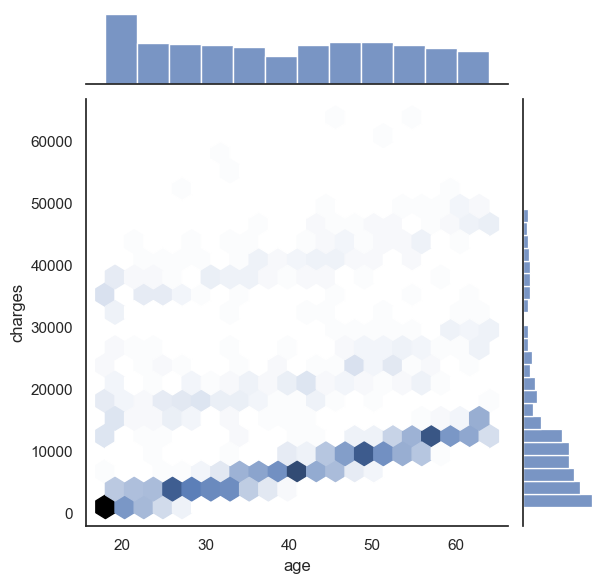

In [21]:
sns.set_style("white")
sns.jointplot(x='age',y='charges',data=df, kind='hex')

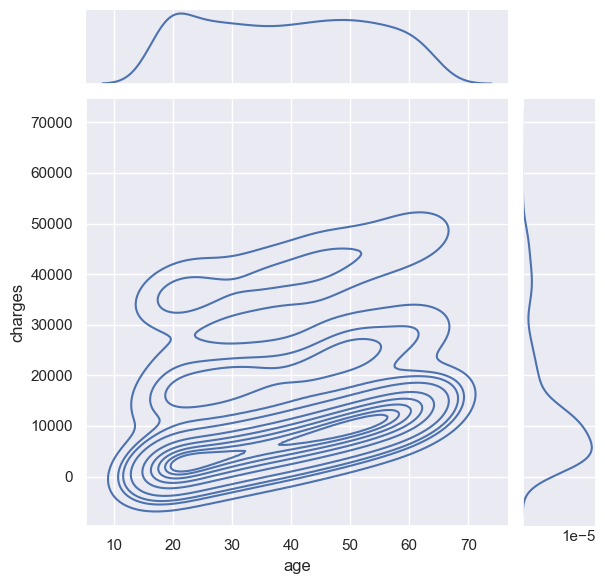

In [22]:
sns.set(color_codes=True)
sns.jointplot(x=df['age'],y=df['charges'],kind='kde')

In [23]:
# f, ax = plt.subplots(figsize=(8,6))
# cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1,reverse=False)
# sns.kdeplot(df['age'],df['charges'],cmap=cmap,n_levels=72,shade=True)

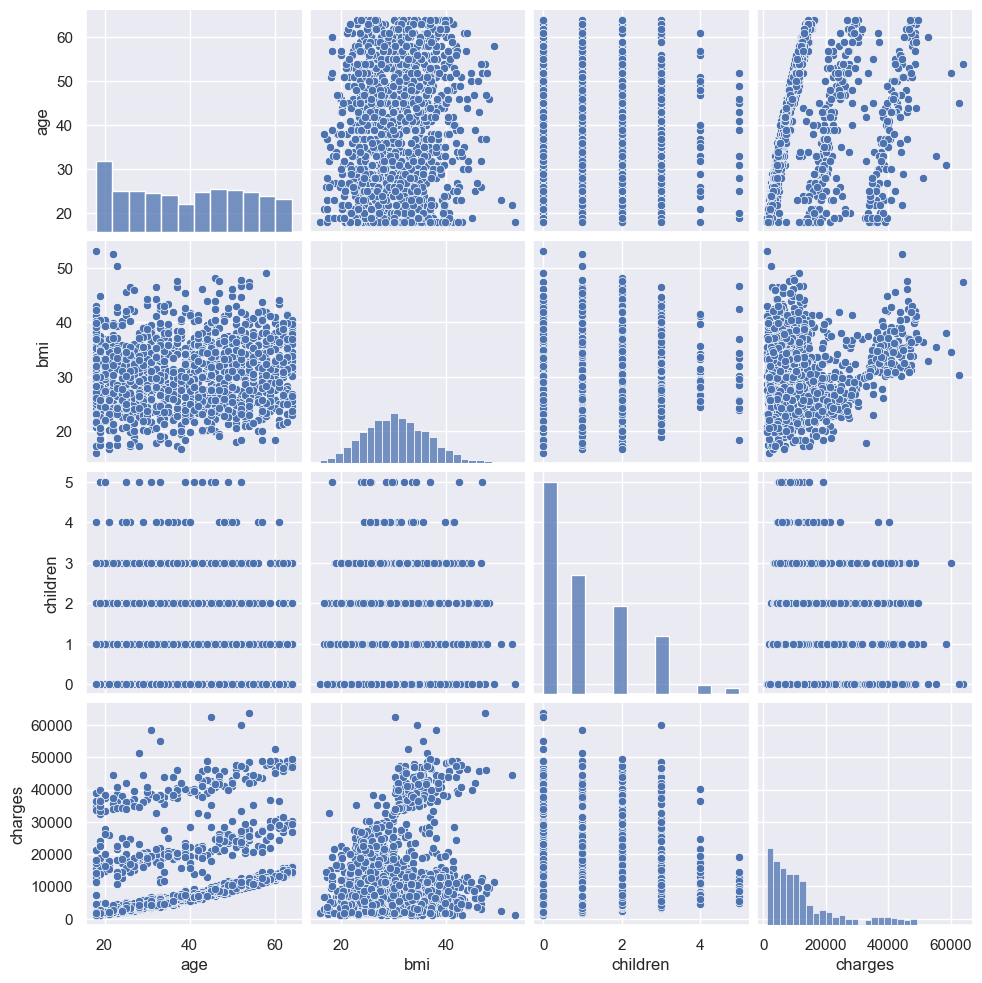

In [24]:
sns.pairplot(df)

In [26]:
import plotly.express as px
fig = px.scatter_3d(df, x = 'age', y='charges', z='bmi',color='smoker',size='children',symbol='sex')
fig.show()

### Categorical/Num